## Consumer Complaints Notebook
### This notebook is created to analyze and gain insights from customer complaints and improve the business model 

In [1]:
"""
importing necessary libraries
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
reading the data
"""
data = pd.read_csv('Consumer_Complaints.csv')
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726


In [3]:
# get all the columns in the data 
cols = data.columns.tolist()
cols

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

In [4]:
data['Product'].value_counts()

Mortgage                                                                        228167
Debt collection                                                                 148016
Credit reporting                                                                140405
Credit card                                                                      89189
Bank account or service                                                          86206
Student loan                                                                     33044
Consumer Loan                                                                    31591
Payday loan                                                                       5543
Money transfers                                                                   5355
Prepaid card                                                                      3817
Credit reporting, credit repair services, or other personal consumer reports      3490
Other financial service                    

#### Data Analysis 

Presenting the data for deep cleaning. Below are the steps we are going to take to carry an in-depth data cleansing.
- Data Cleaning/Quality Check
- Data Transformation
- Data 
- Data Modelling

In [5]:
#creating a copy of the data for analysis 
df = data.copy()

In [6]:
# check for the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 777959 non-null  object
 1   Product                       777959 non-null  object
 2   Sub-product                   542822 non-null  object
 3   Issue                         777959 non-null  object
 4   Sub-issue                     320986 non-null  object
 5   Consumer complaint narrative  157865 non-null  object
 6   Company public response       197884 non-null  object
 7   Company                       777959 non-null  object
 8   State                         772056 non-null  object
 9   ZIP code                      772001 non-null  object
 10  Tags                          109264 non-null  object
 11  Consumer consent provided?    288311 non-null  object
 12  Submitted via                 777959 non-null  object
 13 

From the table shown above, we can deduce that 98% of our dataset are catergorical variables. Complaint ID happens to be only numerical variable. <br>
Also we can see that some of the columns have missing data 

In [7]:
# calculate the total records in the data 
total_data_length = len(df)
print(f'The total records in our dataset is {total_data_length}')

The total records in our dataset is 777959


In [8]:
def missing_data_percent(df):
    """
    This function takes in a dataframe and returns the sum and percentage of missing data in all the dataframe columns
    :params: pandas dataframe 
    :return: sum and percentage of missing data in all columns 
    :rtype: dataframe object     
    """
    missing_cols = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_cols.append(col)
            
    missing_total = df[missing_cols].isnull().sum()
    len_data = len(df)
    missing_percent = round((missing_total/len_data)*100, 3)
    missing_data = pd.concat([missing_total, missing_percent], axis=1, keys = ['Total Missing Data', '% Missing Data'])
    return missing_data.T

In [9]:
missing_data_percent(df)

,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,State,ZIP code,Tags,Consumer consent provided?,Consumer disputed?
Total Missing Data,235137.000,456973.00,620094.000,580075.000,5903.000,5958.000,668695.000,489648.00,9545.000
% Missing Data,30.225,58.74,79.708,74.564,0.759,0.766,85.955,62.94,1.227


In the table above, we display all the categories that have missing data and how much of the data is missing <br>
Now we handle each category one after the other 

##### Handling Missing Data 

In [10]:
"""
Handling the sub-product column
"""
print(f"There are {df['Sub-product'].nunique()} unique features in the sub-prodcut column")
print("")
print("The top 5 frequent columns are:")

df['Sub-product'].value_counts()[:5]


There are 75 unique features in the sub-prodcut column

The top 5 frequent columns are:


Other mortgage                           86622
Conventional fixed mortgage              70607
Checking account                         59539
Other (i.e. phone, health club, etc.)    44534
I do not know                            30326
Name: Sub-product, dtype: int64

- From the missing percent table above, we can see that the sub-product column is missing 30 percent of its data. <br>
- Also we can deduce that sub-products are from products, therefore we can decide to dop the column and focus on the products column 

In [11]:
"""
Handling the sub-issue column
"""
print(f"There are {df['Sub-issue'].nunique()} unique features in the sub-issue column")
print("")
print("The top 5 frequent columns are:")

df['Sub-issue'].value_counts()[:5]

There are 193 unique features in the sub-issue column

The top 5 frequent columns are:


Account status                          37057
Debt is not mine                        36740
Information is not mine                 32372
Not given enough info to verify debt    21809
Debt was paid                           16869
Name: Sub-issue, dtype: int64

- From the missing percent table above, we can see that the sub-issue column is missing 59 percent of its data. <br>
- Similarly to the sub-products column,  we can deduce that sub-issues are a breakdown of the "Issues" column, <br>
    therefore we can decide to dop the column and focus on the Issues column 

In [12]:
"""
Handling the consumer complaint narrative column 
"""

'\nHandling the consumer complaint narrative column \n'

- From our table above, 80 percent of the consumer complaint narrative is missing <br>
- Although it is an important column, however, it is specific to each individual and the missing data cannot be filled <br>
- Also, the percentage of missing data is too great for the column to be useful for analysis in this case, therefore we can decide to drop it

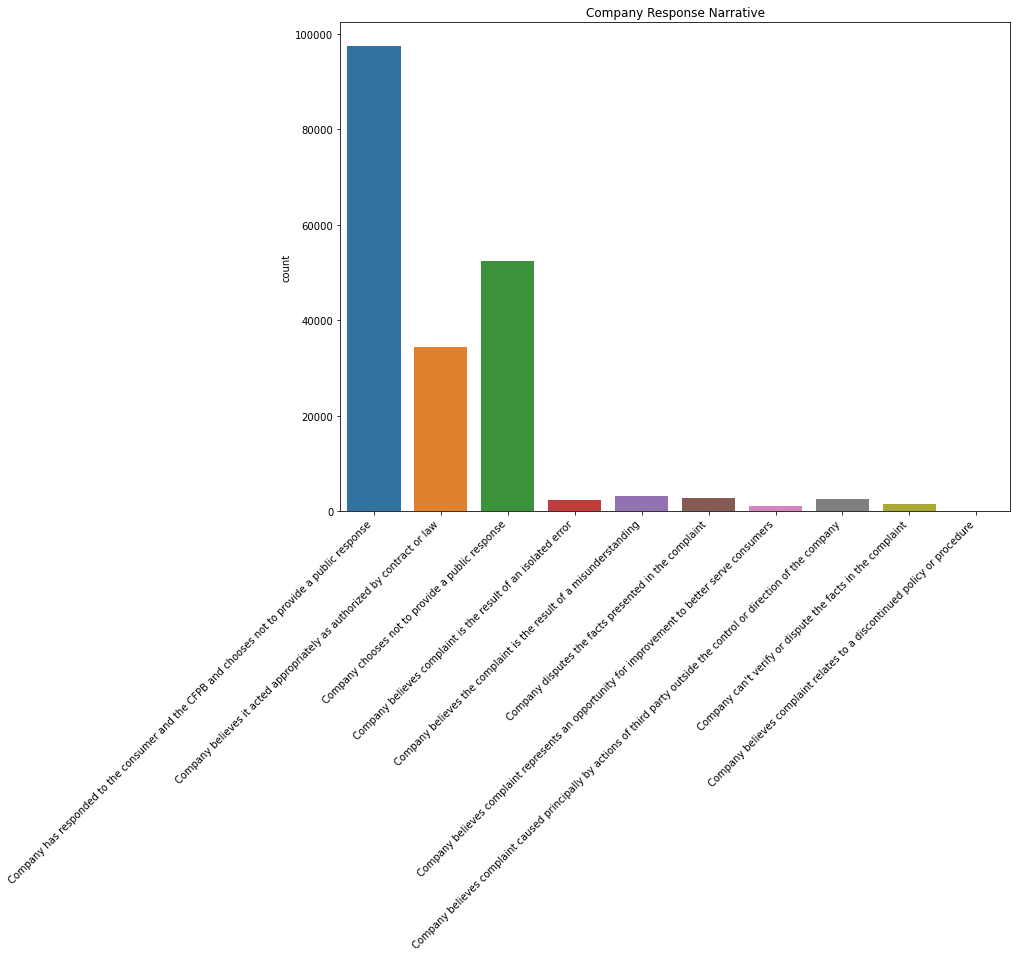

In [13]:
"""
Handling the company public response column 
"""

plt.figure(figsize=(12,9))
ax = sns.countplot(df['Company public response'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("")
plt.title("Company Response Narrative")
plt.show()

- From our table above, 75 percent of the company public response is missing
- From the data available, we can deduce that the company mostly declines public responses
- The percentage of missing data is too great for the column to be useful for analysis in this case, therefore we can decide to drop it

In [14]:
# # check the missing states 
# missing_states = df['State'].isnull().sum()
# # missing_states

# # percentage of missing states
# percent = 100
# missing_states_perc = (missing_states / total_data_length) * percent
# print(f'There are {missing_states_perc:.2f}% states missing and it represents a small portion of the data')

In [15]:
"""
Handling the States column
"""
# get state count in the data
state = df['State'].value_counts()
# convert pandas series to dataframe
state_df = state.sort_values(ascending=True).to_frame()
print(state_df)

#creating new data frame of all the missing states
missing_states_df = df[df["State"].isnull()==True]

#getting ythe non-null zipcodes in the missing states dataframe
zip_found = missing_states_df[missing_states_df['ZIP code'].isnull() == False]

#getting the number of missing states with valid zip codes
len(zip_found[["ZIP code", "State"]])

     State
PW      12
AA      13
AS      25
MH      30
MP      31
..     ...
GA   36889
NY   53161
TX   60400
FL   74507
CA  111765

[62 rows x 1 columns]


18

- From our missing_percent table above, we can see that less than 1 percent of the States is missing
- We check if the zip codes for the missing states are valid so we can use it to fill
- However, only 18 out of 5903 rows have valid zip codes
- The missing data in this case is little, theerefore we can simply drop columns with missing states

In [16]:
"""
Handling the ZIP codes column
"""
# get state count in the data
zip_code = df['ZIP code'].value_counts()

# convert pandas series to dataframe
zip_code_df = zip_code.sort_values(ascending=True).to_frame()

print(zip_code_df)

#creating new data frame of all the missing zip codes
missing_zip_df = df[df["ZIP code"].isnull()==True]

#getting ythe non-null zipcodes in the missing states dataframe
states_found = missing_zip_df[missing_zip_df['State'].isnull() == False]

#getting the number of missing states with valid zip codes
len(states_found[['State', 'ZIP code']])
print(f"There are only {len(states_found[['State', 'ZIP code']])} rows  with valid states")

       ZIP code
02584         1
35447         1
09263         1
8/571         1
33665         1
...         ...
331XX      1864
606XX      1974
770XX      2144
750XX      2146
300XX      3102

[28420 rows x 1 columns]
There are only 73 rows  with valid states


- From our missing_percent table above, we can see that less than 1 percent of the ZIP codes is missing
- We check if the states for the missing zip codes are valid in order to use them to fill the missing zip codes
- However, only 73 out of 5958 rows have valid states
- The missing data in this case is little, theerefore we can simply drop columns with missing zip codes

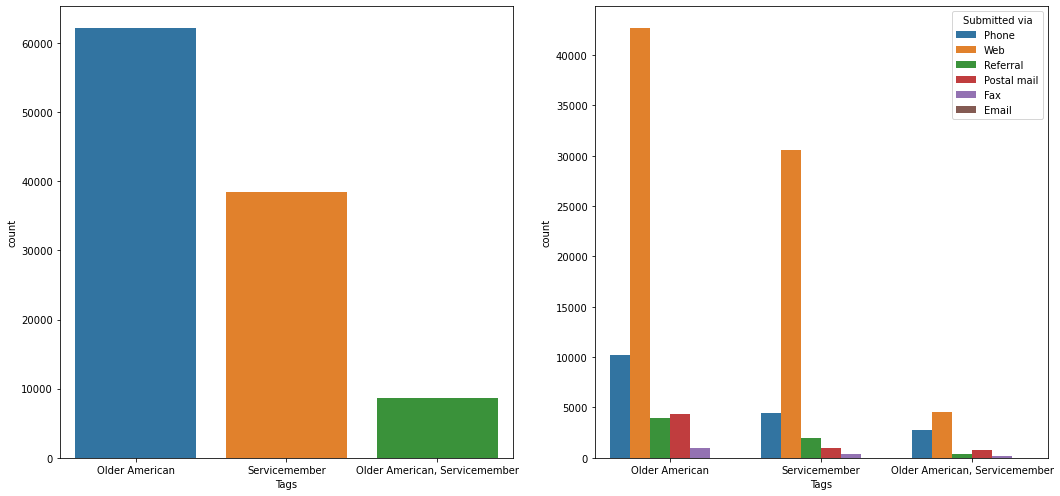

In [17]:
"""
Handling the Tags column
"""
plt.figure(figsize=(15,7))

#Checking the distribution of the Tags
plt.subplot(1,2,1)
sns.countplot(df['Tags'])

plt.subplot(1,2,2)
#Checking the distribution of the Tags by method of submission of complaints
sns.countplot(df['Tags'],  hue=df['Submitted via'])

plt.tight_layout()

- From the plots above, we can see that thd Tags column contains either Older Americans, Service members, or both 
- We can also tell that a very high frequency of people used the web to submit their complaints, with a significant number using their phones
- However, from our missing_percent table, we can see that 85 percent of the Tags column is missing
- The missing data in this case is therefore too great, and cannot be used effectively, so we drop it


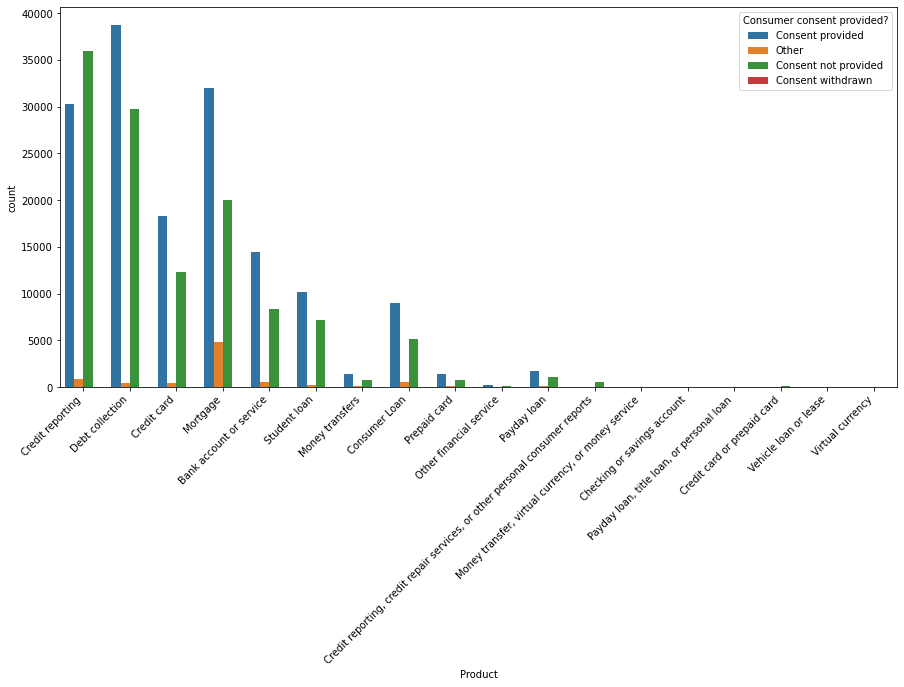

Consent provided        157865
Consent not provided    121988
Other                     8413
Consent withdrawn           45
Name: Consumer consent provided?, dtype: int64

In [18]:
"""
Handling the Consumer consent provided? column
"""
plt.figure(figsize=(15,7))
labels = list(df['Product'].unique())
ax = sns.countplot(df['Product'], hue=df['Consumer consent provided?'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.move_legend(ax, loc="upper right")
plt.show()

df['Consumer consent provided?'].value_counts()
#  bbox_to_anchor=(.55, .45)

- From our missing_percent table, we can see that 62 percent Consumer consent provided of the  column is missing
- From our analysis, Consent Provided and Consent not provided are the two most frequent occurrences 
- Therefore to acheive a similar ratio to what is already in the dataset, we use the forward fill method,
- This ensures that we still have  Consent Provided and Consent not provided as the most frequent occurrences 

In [19]:
# labels = list(df['Product'].unique())
# plt.figure(figsize=(15,12))
# ax = sns.countplot(df['Product'], hue=df['Consumer consent provided?'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# sns.move_legend(ax, loc="upper right")
# plt.show()

# #  bbox_to_anchor=(.55, .45)

In [20]:
mask = df.columns.tolist()
cols = [col.replace(" ","_") for col in mask if col.startswith('D')]
cols

['Date_received', 'Date_sent_to_company']

No     620036
Yes    148378
Name: Consumer disputed?, dtype: int64


Web            7954
Postal mail     597
Referral        503
Phone           419
Fax              72
Name: Submitted via, dtype: int64

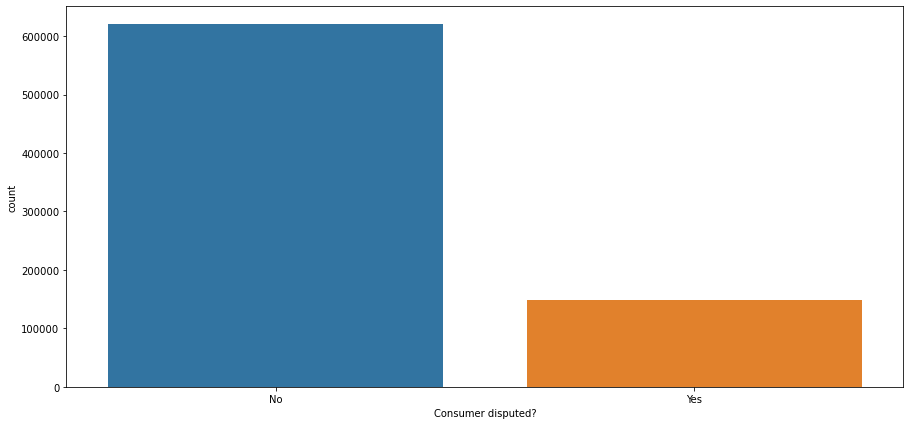

In [21]:
"""
Handling the Consumer disputed column
"""
plt.figure(figsize=(15,7))
print(df['Consumer disputed?'].value_counts())
ax = sns.countplot(df['Consumer disputed?'], )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

dispute_missing = df[df['Consumer disputed?'].isnull() != False]
dispute_missing['Submitted via'].value_counts()
dispute_missing['Submitted via'].value_counts()


# plt.tight_layout()

- From our missing_percent table, 1 percent of the "Consumer_disputed?" is missing 
- We created a dataframe containing only rows where the "Consumer_disputed?" was missing
- From the new dataframe, we can see that there is no logical relationship with any of the other variables
- Since the missing data is small, and we can't establish any pattern that can be used to fill them, we drop the rows where the data is missing 

In [22]:
"""
final cleaning deduced from  analysis 
"""

#Creating a list of columns to be dropped
drop_columns = ['Date received', 'Complaint ID', 'Sub-product', 'Sub-issue',
                'Consumer complaint narrative','Company public response', 'Tags']

#dropping the columns from the drop_columns list
df.drop(columns=drop_columns, inplace=True)

# Dropping rows with missing data from important columns 
df.dropna(subset=['State', 'ZIP code', 'Consumer disputed?'], inplace=True)

#Forward fill missing columns
df['Consumer consent provided?'].fillna(method='ffill', inplace=True)

- We add the "Date received" and "Complaint ID" columns to the drop_columns list to since they are not relevant for our analysis 
- Now we can check our data to see the cleaning we just carried out 

In [23]:
#Checking for missing values
missing_data_percent(df)

,Consumer consent provided?
Total Missing Data,9.000
% Missing Data,0.001


- We can see that some rows in the "Consumer consent provided?" column are still missing 
- This is because we used forward fill which fills the next missing data with the value in the previous row
- The rows with no valid data in their previous rows are not filled hence the missing data

In [24]:
#Checking the counts of unique rows in the Consumer consent provided? column
print(df['Consumer consent provided?'].value_counts())

#filling the missing data 
df['Consumer consent provided?'].fillna("Consent provided", inplace=True)

Consent provided        420739
Consent not provided    319646
Other                    22322
Consent withdrawn           18
Name: Consumer consent provided?, dtype: int64


- We check the count of each category in the "Consumer consent provided?" column 
- Then we fill the remaining ,issing values with the most frequent occurence
- This helps eliminate missing values and still keeps the dataset balanced

In [25]:
#Check for missing values
missing_data_percent(df)

""
Total Missing Data
% Missing Data


- Now we have finally rid our data of missing values 

In [26]:
#Checking the count of ZIP codes with irregularities
print(df["ZIP code"].str.contains("X").value_counts())

#dropping the columns 
df = df[~df['ZIP code'].astype('str').str.contains("X")]

False    593746
True     168988
Name: ZIP code, dtype: int64


- We discover that our ZIP codes column has irregularities, where some of the zip codes are invalid as they contain the letter 'X'
- So we drop the rows where this occurrence is prevalent 

In [27]:
# #Cleaning column names by replacing spaces with underscores
df.columns = [cols.replace(' ', '_' ) for cols in df.columns]

#previewing the column names after cleaning
df.columns

Index(['Product', 'Issue', 'Company', 'State', 'ZIP_code',
       'Consumer_consent_provided?', 'Submitted_via', 'Date_sent_to_company',
       'Company_response_to_consumer', 'Timely_response?',
       'Consumer_disputed?'],
      dtype='object')

- We can see that there are inconsistencies in our column names, so we address this with some additional cleaning
- We do this by replacing spaces in column names with underscores 

In [28]:
#Saving the data to a new csv file 

df.to_csv("Cleaned_Consumer_Complaints.csv", index=False)

- Now that our data is fully cleaned, we save our new data so that it can be used for the the next stage of  analysis